<img src=images/MIT_logo.jpg width=150 align=right />

# PROFESSIONAL CERTIFICATE IN DATA SCIENCE AND ANALYTICS
# Correlation
This code imports three essential Python libraries commonly used for data analysis, manipulation, and visualization. \
Each library serves a specific purpose, and together they provide a powerful toolkit for working with data.

1. **NumPy (`import numpy as np`)**:
   - NumPy is a fundamental library for numerical computing in Python. \
  It provides support for multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently.
   - NumPy is often used for tasks such as numerical calculations, generating random numbers, and performing linear algebra operations. \
  The alias `np` is a standard convention that makes it easier to reference the library in the code.

1. **Pandas (`import pandas as pd`)**:
   - Pandas is a library designed for data manipulation and analysis. \
  It introduces two primary data structures: `DataFrame` (for tabular data) and `Series` (for one-dimensional data). \
  These structures make it easy to clean, transform, and analyze data.
   - Pandas is particularly useful for handling structured data, such as CSV files or SQL database outputs. \
  The alias `pd` is a standard convention that simplifies referencing the library in the code.

1. **Matplotlib (`from matplotlib import pyplot as plt`)**:
   - Matplotlib is a popular library for creating static, interactive, and animated visualizations in Python. \
  The `pyplot` module provides a MATLAB-like interface for generating plots.
   - This library is commonly used to create line plots, bar charts, scatter plots, and other types of visualizations. \
  The alias `plt` is a standard convention that makes it easier to call plotting functions.

1. **`# type: ignore` Comments**:
   - The `# type: ignore` comments are used to suppress type-checking errors from tools like `mypy`. \
  These errors might occur if the type-checking tool cannot resolve the types of the imported libraries or if the libraries are not installed in the type-checker's environment.
   - Adding these comments ensures that the code runs without interruptions during development, especially when type-checking is not critical.

### Purpose:
This setup is a standard starting point for many data science and analytics projects. \
`NumPy` handles numerical computations, \
`Pandas` manages and manipulates structured data, \
and `Matplotlib` provides visualization capabilities. \
Together, these libraries form the foundation for exploring, analyzing, and presenting data effectively.

In [1]:
import numpy                    as np  # type: ignore
import pandas                   as pd  # type: ignore
from   matplotlib import pyplot as plt # type: ignore

## Portfolio selection problem
[Modern portfolio theory](https://en.wikipedia.org/wiki/Modern_portfolio_theory) implies that allocating an optimal amount of capital to different assets in a portfolio can result in a better risk-return profile than any of the individual assets in that portfolio.


This code creates a **Pandas DataFrame** to store statistical data about two companies, Amazon and Walmart, and then displays the first few rows of the DataFrame using the `head()` method.

### Step-by-Step Explanation:

1. **Creating the DataFrame**:
   - `pd.DataFrame(...)`: This initializes a Pandas DataFrame, which is a tabular data structure with labeled rows and columns.
   - The data is provided as a dictionary:
     - The key `'Mean'` corresponds to a list `[3.23, 1.08]`, representing the mean returns (in percentage) for Amazon and Walmart, respectively.
     - The key `'SD'` corresponds to a list `[8.40, 5.38]`, representing the standard deviations (SD) of returns for Amazon and Walmart, which measure the risk or variability of returns.
   - The `index` parameter specifies the row labels as `['Amazon', 'Walmart']`, making it clear which data belongs to each company.

   The resulting DataFrame looks like this:
   ```
           Mean    SD
   Amazon   3.23   8.40
   Walmart  1.08   5.38
   ```

2. **Displaying the DataFrame with `head()`**:
   - `returns.head()`: This method displays the first few rows of the DataFrame. By default, it shows the top 5 rows, but since the DataFrame only contains two rows, both are displayed.
   - The `head()` method is particularly useful when working with large datasets, as it allows you to preview the structure and content of the DataFrame without printing the entire dataset.

### Purpose:
This code is part of a financial analysis, where the **mean return** represents the average percentage gain or loss for each company, and the **standard deviation** quantifies the risk or variability of those returns. By organizing this data into a DataFrame, it becomes easier to perform further analysis, such as portfolio optimization or risk assessment. The use of `head()` ensures a quick and concise preview of the data structure.

In [ ]:
returns = pd.DataFrame({'Mean': [3.23, 1.08],'SD': [8.40, 5.38]},index=['Amazon', 'Walmart'])
returns.head()

,Mean,SD
Amazon,3.23,8.40
Walmart,1.08,5.38


If we invest `a` and `b` proportions of capital in each company, we can compute the resulting mean return and risk (return SD): 

The code calculates and visualizes the mean return and risk (standard deviation of returns) of a portfolio consisting of two assets, \
Amazon and Walmart, based on varying proportions of capital invested in each. It also identifies the portfolio configuration that minimizes risk.

### Step-by-Step Explanation:

1. **Defining Proportions of Capital (`a` and `b`)**:
   - `np.linspace(0, 1, 101)`: Generates 101 evenly spaced values between 0 and 1, representing the \
  proportion of capital (`a`) invested in Amazon. 
   - `b = 1 - a`: Calculates the proportion of capital (`b`) invested in Walmart, ensuring that \
  the total allocation sums to 100%.

1. **Calculating Portfolio Mean Return**:
   - `mean_return_portfolio`: Computes the weighted average of the mean returns of Amazon and Walmart \
  based on the proportions `a` and `b`. The mean returns for Amazon and Walmart are retrieved from the `returns` \
  DataFrame using `returns.loc`.

1. **Calculating Portfolio Risk (Standard Deviation)**:
   - `sd_return_portfolio`: Computes the portfolio's standard deviation of returns using the formula for combining variances of independent assets:
     ```
     SD_portfolio = sqrt(a^2 * SD_Amazon^2 + b^2 * SD_Walmart^2)
     ```
     Here, `SD_Amazon` and `SD_Walmart` are the standard deviations of returns for Amazon and Walmart, respectively.

2. **Identifying the Minimum Risk Portfolio**:
   - `np.argmin(sd_return_portfolio)`: Finds the index of the smallest value in the `sd_return_portfolio` array, corresponding to the portfolio configuration with the lowest risk.
   - The optimal proportion of capital in Amazon (`a[min_risk_idx]`), the minimum risk (`sd_return_portfolio[min_risk_idx]`), and the corresponding mean return (`mean_return_portfolio[min_risk_idx]`) are printed using the `print` function.

3. **Visualizing the Results**:
   - `plt.subplots(1, 2, figsize=(12, 5))`: Creates two side-by-side subplots for visualizing the portfolio's mean return and risk as functions of `a`.
   - `ax[0].plot(a, mean_return_portfolio)`: Plots the mean return of the portfolio against the proportion of capital in Amazon.
   - `ax[1].plot(a, sd_return_portfolio)`: Plots the risk (standard deviation) of the portfolio against the proportion of capital in Amazon.
   - `ax[0].scatter(...)` and `ax[1].scatter(...)`: Highlight the portfolio configuration with the minimum risk on both plots using orange markers.
   - Titles, axis labels, and limits are added to enhance readability.

4. **Displaying the Plots**:
   - `plt.show()`: Displays the plots, providing a visual representation of how the portfolio's mean return and risk change with varying allocations to Amazon and Walmart.

### Purpose:
This code demonstrates how to compute and visualize the trade-off between risk and return in a two-asset portfolio. By identifying the portfolio configuration with the minimum risk, it provides valuable insights for portfolio optimization, a key concept in modern portfolio theory. The visualizations help to intuitively understand the relationship between asset allocation, expected returns, and risk.

Optimal `a`           : 0.29
Minimum risk          : 4.53
Return of minimum risk: 1.7


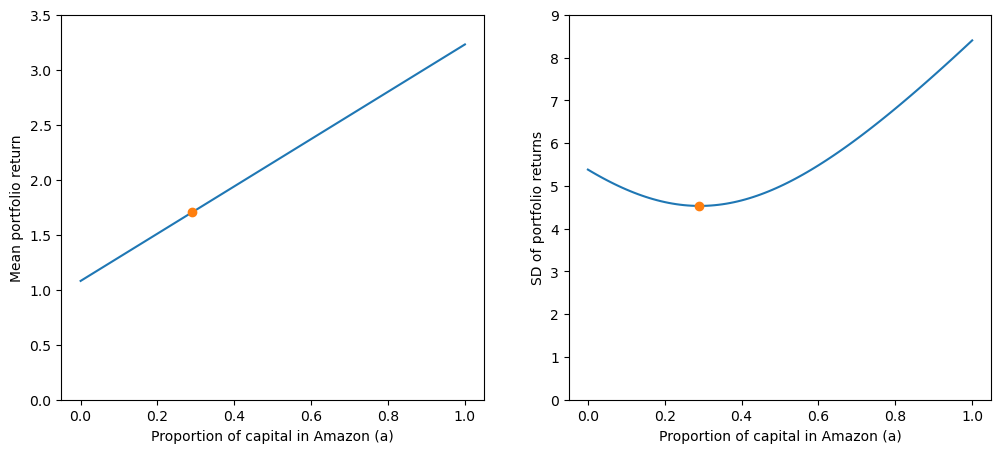

In [8]:
a                     = np.linspace(0, 1, 101)
b                     = 1 - a 
mean_return_portfolio = a * returns.loc['Amazon', 'Mean'] + b * returns.loc['Walmart', 'Mean']
sd_return_portfolio   = np.sqrt(a**2 * returns.loc['Amazon', 'SD']**2 + b**2 * returns.loc['Walmart', 'SD']**2)
min_risk_idx          = np.argmin(sd_return_portfolio)
print('Optimal `a`           :', round(a[min_risk_idx], 2))
print('Minimum risk          :', round(sd_return_portfolio[min_risk_idx], 2))
print('Return of minimum risk:', round(mean_return_portfolio[min_risk_idx], 2))
fig, ax               = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(a, mean_return_portfolio)
ax[1].plot(a, sd_return_portfolio)
ax[0].scatter(a[min_risk_idx], mean_return_portfolio[min_risk_idx], c='tab:orange', zorder=2)
ax[1].scatter(a[min_risk_idx], sd_return_portfolio[min_risk_idx], c='tab:orange', zorder=2)
ax[0].set_ylim((0, 3.5))
ax[1].set_ylim((0, 9))
ax[0].set_xlabel('Proportion of capital in Amazon (a)')
ax[1].set_xlabel('Proportion of capital in Amazon (a)')
ax[0].set_ylabel('Mean portfolio return')
ax[1].set_ylabel('SD of portfolio returns')
plt.show()

This code calculates and visualizes two key metrics for evaluating a portfolio's performance: the **coefficient of variation** and the **Sharpe ratio**, based on varying proportions of capital invested in two assets, Amazon and Walmart. It also identifies the portfolio configuration that minimizes the coefficient of variation and maximizes the Sharpe ratio.

### Step-by-Step Explanation:

1. **Setting Up the Plot**:
   - `plt.subplots(1, 2, figsize=(12, 5))`: Creates a figure with two subplots arranged in a single row. The figure size is set to 12x5 inches for better readability. The `ax` variable holds the two subplot axes.

2. **Calculating Metrics**:
   - `coefficient_variation = sd_return_portfolio / mean_return_portfolio`: The coefficient of variation is calculated as the ratio of the portfolio's standard deviation (`sd_return_portfolio`) to its mean return (`mean_return_portfolio`). This metric measures the risk per unit of return, with lower values indicating better risk-adjusted performance.
   - `sharpe_ratio = mean_return_portfolio / sd_return_portfolio`: The Sharpe ratio is calculated as the ratio of the portfolio's mean return to its standard deviation. It measures the return per unit of risk, with higher values indicating better performance.

3. **Identifying the Optimal Portfolio**:
   - `np.argmin(coefficient_variation)`: Finds the index of the smallest value in the `coefficient_variation` array, corresponding to the portfolio configuration with the lowest risk per unit of return.
   - The optimal proportion of capital in Amazon (`a[min_cv_idx]`), the minimum coefficient of variation (`coefficient_variation[min_cv_idx]`), and the maximum Sharpe ratio (`sharpe_ratio[min_cv_idx]`) are printed using the `print` function.

4. **Visualizing the Metrics**:
   - `ax[0].plot(a, coefficient_variation)`: Plots the coefficient of variation against the proportion of capital in Amazon (`a`).
   - `ax[1].plot(a, sharpe_ratio)`: Plots the Sharpe ratio against the proportion of capital in Amazon (`a`).
   - `ax[0].scatter(...)` and `ax[1].scatter(...)`: Highlight the portfolio configuration with the minimum coefficient of variation and maximum Sharpe ratio on the respective plots using orange markers.

5. **Customizing the Plots**:
   - `ax[0].set_ylim((0, 5.5))` and `ax[1].set_ylim((0, 0.5))`: Set the y-axis limits for better visualization of the metrics.
   - Axis labels are added to both subplots for clarity:
     - The x-axis is labeled as "Proportion of capital in Amazon (a)" for both subplots.
     - The y-axis is labeled as "Coefficient of variation" for the first subplot and "Sharpe ratio" for the second subplot.

6. **Displaying the Plot**:
   - `plt.show()`: Renders and displays the plots, providing a visual representation of how the coefficient of variation and Sharpe ratio change with varying allocations to Amazon and Walmart.

### Purpose:
This code helps evaluate the trade-offs between risk and return in a two-asset portfolio by analyzing two important metrics:
- The **coefficient of variation** identifies the portfolio configuration with the lowest risk per unit of return.
- The **Sharpe ratio** highlights the portfolio configuration with the highest return per unit of risk.

These visualizations and calculations are essential for making informed decisions in portfolio optimization and risk management.

Optimal `a`                     : 0.55
Minimum coefficient of variation: 2.31
Maximum Sharpe ratio            : 0.43


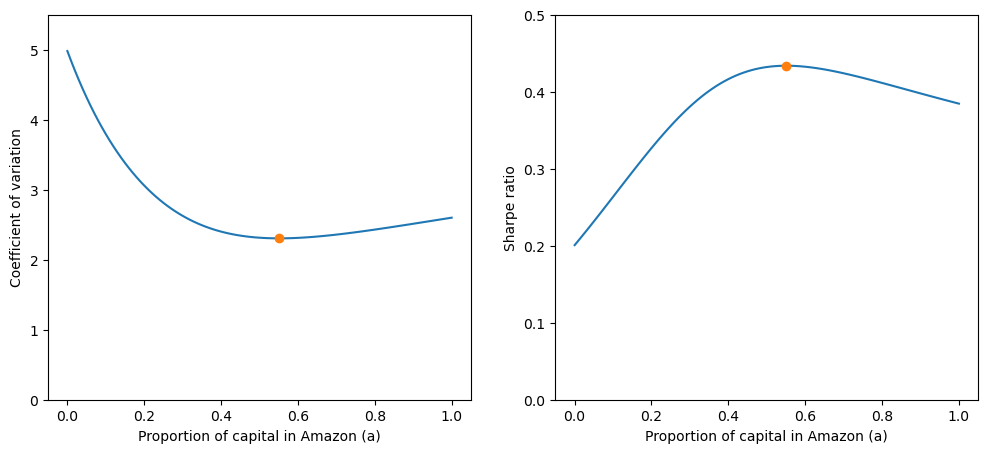

In [9]:
fig, ax               = plt.subplots(1, 2, figsize=(12, 5))
coefficient_variation = sd_return_portfolio / mean_return_portfolio
sharpe_ratio          = mean_return_portfolio / sd_return_portfolio
min_cv_idx            = np.argmin(coefficient_variation)
print('Optimal `a`                     :', round(a[min_cv_idx], 2))
print('Minimum coefficient of variation:', round(coefficient_variation[min_cv_idx], 2))
print('Maximum Sharpe ratio            :', round(sharpe_ratio[min_cv_idx], 2))
ax[0].plot(a, coefficient_variation)
ax[1].plot(a, sharpe_ratio)
ax[0].scatter(a[min_cv_idx], coefficient_variation[min_cv_idx], c='tab:orange', zorder=2)
ax[1].scatter(a[min_cv_idx], sharpe_ratio[min_cv_idx], c='tab:orange', zorder=2)
ax[0].set_ylim((0, 5.5))
ax[1].set_ylim((0, 0.5))
ax[0].set_xlabel('Proportion of capital in Amazon (a)')
ax[1].set_xlabel('Proportion of capital in Amazon (a)')
ax[0].set_ylabel('Coefficient of variation')
ax[1].set_ylabel('Sharpe ratio')
plt.show()

### Correlated stocks
Up to this point, we have assumed that the two stocks are not correlated, but correlation will affect the results significantly and in practice has to be accounted for.

This code incorporates the effect of correlation between two assets, Amazon and Walmart, into the calculation of portfolio risk (standard deviation of returns). It visualizes how the portfolio's mean return and risk change with varying allocations of capital, while comparing the results for uncorrelated and correlated assets.

### Step-by-Step Explanation:

1. **Defining Correlation**:
   - `correlation = 0.11`: Specifies the correlation coefficient between the returns of Amazon and Walmart. A positive value indicates that the two assets tend to move in the same direction, though not perfectly.

2. **Calculating Portfolio Risk with Correlation**:
   - `cor_sd_return_portfolio`: Computes the portfolio's standard deviation of returns, accounting for the correlation between the two assets. The formula used is:
     ```
     SD_portfolio = sqrt(a^2 * SD_Amazon^2 + b^2 * SD_Walmart^2 + 2 * a * b * SD_Amazon * SD_Walmart * correlation)
     ```
     Here, `a` and `b` are the proportions of capital invested in Amazon and Walmart, respectively, and `SD_Amazon` and `SD_Walmart` are their standard deviations of returns.

3. **Identifying the Minimum Risk Portfolio**:
   - `np.argmin(cor_sd_return_portfolio)`: Finds the index of the smallest value in the `cor_sd_return_portfolio` array, corresponding to the portfolio configuration with the lowest risk when correlation is considered.
   - The optimal proportion of capital in Amazon (`a[cor_min_risk_idx]`), the minimum risk (`cor_sd_return_portfolio[cor_min_risk_idx]`), and the corresponding mean return (`mean_return_portfolio[cor_min_risk_idx]`) are printed using the `print` function.

4. **Visualizing the Results**:
   - `plt.subplots(1, 2, figsize=(12, 5))`: Creates two side-by-side subplots for visualizing the portfolio's mean return and risk.
   - `ax[0].plot(a, mean_return_portfolio)`: Plots the mean return of the portfolio against the proportion of capital in Amazon.
   - `ax[1].plot(a, sd_return_portfolio, linestyle='dashed')`: Plots the portfolio risk assuming no correlation (dashed line).
   - `ax[1].plot(a, cor_sd_return_portfolio, c='tab:blue')`: Plots the portfolio risk with correlation (solid blue line).
   - `ax[0].scatter(...)` and `ax[1].scatter(...)`: Highlight the portfolio configurations with the minimum risk for both uncorrelated and correlated cases using orange markers.

5. **Adding Legends and Labels**:
   - `ax[1].legend(['Correlation = 0', 'Correlation = 0.11'])`: Adds a legend to distinguish between the uncorrelated and correlated risk curves.
   - Axis labels and limits are set for clarity:
     - The x-axis represents the proportion of capital in Amazon (`a`).
     - The y-axis represents the mean portfolio return (left plot) and portfolio risk (right plot).

6. **Displaying the Plot**:
   - `plt.show()`: Renders and displays the plots, providing a visual comparison of portfolio risk with and without correlation.

### Purpose:
This code demonstrates how correlation between assets affects portfolio risk. By incorporating correlation into the risk calculation, it provides a more realistic assessment of portfolio performance. The visualizations highlight the differences in risk profiles for uncorrelated and correlated assets, helping to identify the optimal portfolio configuration under real-world conditions.

Optimal `a`           : 0.27
Minimum risk          : 4.75
Return of minimum risk: 1.66


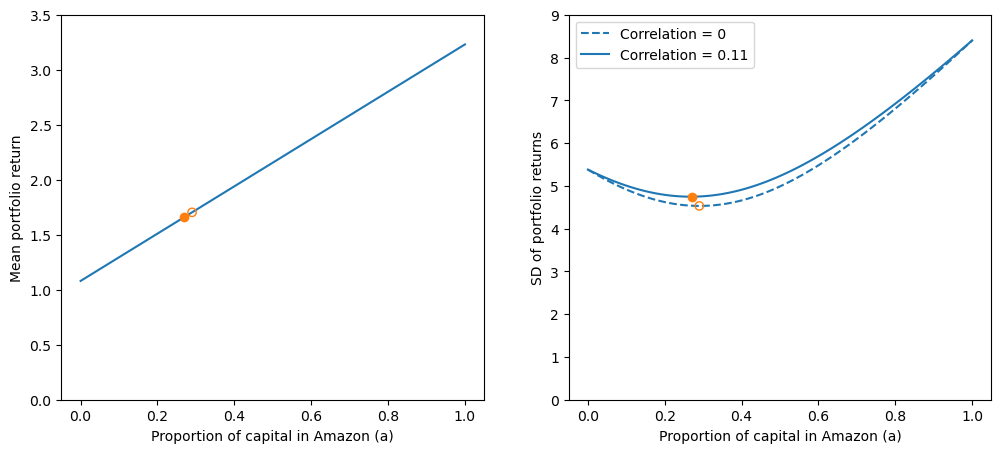

In [10]:
correlation             = 0.11
cor_sd_return_portfolio = np.sqrt(a**2 * returns.loc['Amazon', 'SD']**2 + b**2 * returns.loc['Walmart', 'SD']**2 
                               + 2*a*b * returns.loc['Amazon', 'SD'] *           returns.loc['Walmart', 'SD'] * correlation)
cor_min_risk_idx        = np.argmin(cor_sd_return_portfolio)
print('Optimal `a`           :', round(a[cor_min_risk_idx], 2))
print('Minimum risk          :', round(cor_sd_return_portfolio[cor_min_risk_idx], 2))
print('Return of minimum risk:', round(mean_return_portfolio[cor_min_risk_idx], 2))
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(a, mean_return_portfolio)
ax[1].plot(a, sd_return_portfolio, linestyle='dashed')
ax[1].plot(a, cor_sd_return_portfolio, c='tab:blue')
ax[0].scatter(a[min_risk_idx], mean_return_portfolio[min_risk_idx], edgecolors='tab:orange', facecolors='none', zorder=2)
ax[0].scatter(a[cor_min_risk_idx], mean_return_portfolio[cor_min_risk_idx], c='tab:orange', zorder=2)
ax[1].scatter(a[min_risk_idx], sd_return_portfolio[min_risk_idx], edgecolors='tab:orange', facecolors='none', zorder=2)
ax[1].scatter(a[cor_min_risk_idx], cor_sd_return_portfolio[cor_min_risk_idx], c='tab:orange', zorder=2)
ax[1].legend(['Correlation = 0', 'Correlation = 0.11'])
ax[0].set_ylim((0, 3.5))
ax[1].set_ylim((0, 9))
ax[0].set_xlabel('Proportion of capital in Amazon (a)')
ax[1].set_xlabel('Proportion of capital in Amazon (a)')
ax[0].set_ylabel('Mean portfolio return')
ax[1].set_ylabel('SD of portfolio returns')
plt.show()

This code calculates and visualizes two key metrics for evaluating a portfolio's performance—**coefficient of variation** and **Sharpe ratio**—while incorporating the effect of correlation between two assets, Amazon and Walmart. It compares these metrics for both uncorrelated and correlated scenarios, helping to identify the optimal portfolio configuration.

### Step-by-Step Explanation:

1. **Setting Up the Plot**:
   - `plt.subplots(1, 2, figsize=(12, 5))`: Creates a figure with two subplots arranged in a single row. The figure size is set to 12x5 inches for better readability. The `ax` variable holds the two subplot axes.

2. **Calculating Metrics with Correlation**:
   - `cor_coefficient_variation`: This is calculated as the ratio of the portfolio's correlated standard deviation (`cor_sd_return_portfolio`) to its mean return (`mean_return_portfolio`). It measures the risk per unit of return, with lower values indicating better risk-adjusted performance.
   - `cor_sharpe_ratio`: This is calculated as the ratio of the portfolio's mean return to its correlated standard deviation. It measures the return per unit of risk, with higher values indicating better performance.

3. **Identifying the Optimal Portfolio**:
   - `np.argmin(cor_coefficient_variation)`: Finds the index of the smallest value in the `cor_coefficient_variation` array, corresponding to the portfolio configuration with the lowest risk per unit of return.
   - The optimal proportion of capital in Amazon (`a[cor_min_cv_idx]`), the minimum coefficient of variation (`cor_coefficient_variation[cor_min_cv_idx]`), and the maximum Sharpe ratio (`cor_sharpe_ratio[cor_min_cv_idx]`) are printed using the `print` function.

4. **Visualizing the Metrics**:
   - `ax[0].plot(...)` and `ax[1].plot(...)`: Plot the coefficient of variation and Sharpe ratio, respectively, for both uncorrelated (dashed lines) and correlated (solid blue lines) scenarios.
   - `ax[0].scatter(...)` and `ax[1].scatter(...)`: Highlight the portfolio configurations with the minimum coefficient of variation and maximum Sharpe ratio for both scenarios using orange markers.

5. **Adding Legends and Labels**:
   - `ax[0].legend(...)` and `ax[1].legend(...)`: Add legends to distinguish between the uncorrelated and correlated metrics.
   - Axis labels and limits are set for clarity:
     - The x-axis represents the proportion of capital in Amazon (`a`).
     - The y-axis represents the coefficient of variation (left plot) and Sharpe ratio (right plot).

6. **Displaying the Plot**:
   - `plt.show()`: Renders and displays the plots, providing a visual comparison of the metrics for uncorrelated and correlated scenarios.

### Purpose:
This code demonstrates how correlation affects the risk-return trade-offs in a portfolio. By analyzing the coefficient of variation and Sharpe ratio under both uncorrelated and correlated conditions, it provides insights into the optimal portfolio allocation. The visualizations help to intuitively compare the impact of correlation on portfolio performance, aiding in better decision-making for portfolio optimization.

Optimal `a`                     : 0.59
Minimum coefficient of variation: 2.4
Maximum Sharpe ratio            : 0.42


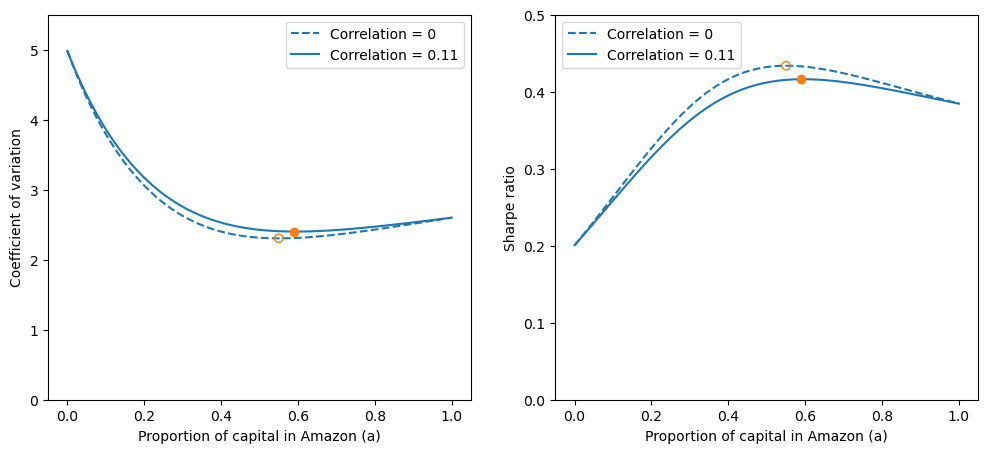

In [11]:
fig, ax                   = plt.subplots(1, 2, figsize=(12, 5))
cor_coefficient_variation = cor_sd_return_portfolio / mean_return_portfolio
cor_sharpe_ratio          = mean_return_portfolio / cor_sd_return_portfolio
cor_min_cv_idx            = np.argmin(cor_coefficient_variation)
print('Optimal `a`                     :', round(a[cor_min_cv_idx], 2))
print('Minimum coefficient of variation:', round(cor_coefficient_variation[cor_min_cv_idx], 2))
print('Maximum Sharpe ratio            :', round(cor_sharpe_ratio[cor_min_cv_idx], 2))
ax[0].plot(a, coefficient_variation, linestyle='dashed')
ax[0].plot(a, cor_coefficient_variation, c='tab:blue')
ax[1].plot(a, sharpe_ratio, linestyle='dashed')
ax[1].plot(a, cor_sharpe_ratio, c='tab:blue')
ax[0].scatter(a[min_cv_idx], coefficient_variation[min_cv_idx], edgecolors='tab:orange', facecolors='none', zorder=2)
ax[0].scatter(a[cor_min_cv_idx], cor_coefficient_variation[cor_min_cv_idx], c='tab:orange', zorder=2)
ax[1].scatter(a[min_cv_idx], sharpe_ratio[min_cv_idx], edgecolors='tab:orange', facecolors='none', zorder=2)
ax[1].scatter(a[cor_min_cv_idx], cor_sharpe_ratio[cor_min_cv_idx], c='tab:orange', zorder=2)
ax[0].legend(['Correlation = 0', 'Correlation = 0.11'])
ax[1].legend(['Correlation = 0', 'Correlation = 0.11'])
ax[0].set_ylim((0, 5.5))
ax[1].set_ylim((0, 0.5))
ax[0].set_xlabel('Proportion of capital in Amazon (a)')
ax[1].set_xlabel('Proportion of capital in Amazon (a)')
ax[0].set_ylabel('Coefficient of variation')
ax[1].set_ylabel('Sharpe ratio')
plt.show()

## Multiple coin tosses (probability of independent events)
Each coin toss is **independent** from the previous one: knowing the outcome of one trial does not give us any information about past or future trials.

Coin 1 | Coin 2
-------|-------
Heads  | Tails
Heads  | Heads
Tails  | Tails
Tails  | Heads

The **joint probability** of independent variables is their product.

$$ P(A, B) = P(A)P(B) $$

## Conditional probability
The **conditional probability** of a variable given another is given by the **Bayes' rule**.

$$ P(A | B) = \frac{P(A, B)}{P(B)} = \frac{P(B | A)P(A)}{P(B)} $$

![](images/Venn_Pie_Chart_describing_Bayes'_law.png)

## Total probability

$$ P(A) = \sum_{i}{P(A | B = b_i)P(B = b_i)} $$